# CSE 5544 Lab 1 Part 2


Harvey Li (li.8460)

## Task 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plot
import numpy as np

In [2]:
df_teams = pd.read_csv('teams.csv')
df_pitchers = pd.read_csv('pitching.csv')
df_players = pd.read_csv('players.csv')

In [3]:
df_teams_sub = df_teams.loc[lambda df:df.yearID.apply(lambda x:x>=2011 and x<=2015)]

### 1.1)

In [4]:
teams_win = {}
for _,row in df_teams_sub.iterrows():
    if row['teamID'] not in teams_win:
        teams_win[row.teamID]=int(row.W)
    else:
        teams_win[row.teamID]=int(row.W)+teams_win[row.teamID]

df_teams_win = pd.Series(teams_win)
df_teams_win.sort_values(ascending=False)

SLN    465
NYA    448
LAN    446
WAS    443
DET    440
LAA    436
TEX    435
PIT    431
TBA    430
SFN    428
ATL    425
BAL    424
OAK    420
KCA    413
CLE    406
CIN    406
BOS    405
TOR    404
MIL    403
ARI    399
NYN    394
PHI    392
CHA    376
SEA    376
SDN    374
CHN    368
MIN    348
COL    345
HOU    318
MIA    279
FLO     72
dtype: int64

In [5]:
teams =[] #Get all teams
for iteam in df_teams_sub['teamID']:
    sign = 0
    for t in teams:
        if iteam == t:
            sign = 1
    if sign == 0:
        teams.append(iteam)


team_years = {} #Get team years during 2011 to 2015
for it in teams:
    team_years[it]=len(df_teams_sub.loc[lambda df:df.teamID == it])
    
teams_game = {} #Get total number of games
for _,row in df_teams_sub.iterrows():
    if row['teamID'] not in teams_game:
        teams_game[row.teamID]=int(row.G)
    else:
        teams_game[row.teamID]=int(row.G)+teams_game[row.teamID]    


teams_ave_ratio = {}
for i in teams_win: #Calculate team average winning every year
    teams_ave_ratio[i]=teams_win[i]/teams_game[i]

df_teams_ave_ratio = pd.Series(teams_ave_ratio) 
# Use the winning ratio as the index for winning records of each team.


### 1.2)

In [6]:
df_players_sub = df_players.loc[lambda df:df.yearID.apply(lambda x:x>=2011 and x<=2015)]


In [7]:
teams_ave_payroll = {}
for _,row in df_players_sub.iterrows():
    if not np.isnan(row.salary):
        if row['teamID'] not in teams_ave_payroll:
            teams_ave_payroll[row.teamID]=float(row.salary)
        else:
            teams_ave_payroll[row.teamID]=float(row.salary)+teams_ave_payroll[row.teamID]

for i in teams_ave_payroll:
    teams_ave_payroll[i]=teams_ave_payroll[i]/team_years[i]

df_teams_ave_payroll = pd.Series(teams_ave_payroll)
df_teams_ave_payroll.sort_values(ascending=False)

NYA    204717513.4
LAN    170401274.0
PHI    161337694.6
BOS    154501998.4
SFN    139546203.4
DET    138945996.2
LAA    130569249.4
TEX    115163137.2
WAS    109018298.6
CHA    107795595.4
SLN    105226428.2
CHN     98844929.6
TOR     96950520.0
CIN     95413461.4
MIN     93435400.0
BAL     92962440.6
MIL     92193062.0
SEA     90090008.6
ATL     85062881.8
NYN     84465720.8
COL     80907762.6
ARI     75352433.2
CLE     72061166.2
SDN     71999488.0
KCA     70633810.0
PIT     70052899.6
OAK     65676180.2
MIA     62898325.0
TBA     58642395.2
FLO     56944000.0
HOU     50803560.0
dtype: float64

### 1.3)

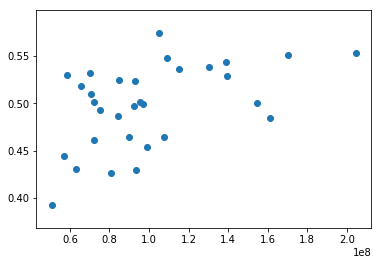

In [8]:


plot.scatter(x=df_teams_ave_payroll,y=df_teams_ave_ratio)

In [9]:
pd.concat([df_teams_ave_payroll,df_teams_ave_ratio],axis=1).corr('pearson')

,0,1
0,1.000000,0.482825
1,0.482825,1.000000


The average payroll of the team is positively related to its total winnings. But the correlation coefficient is not very high.

## Task 2

### 2.1 )

In [10]:
teams_ab = {}
teams_hit = {}
teams_ave_bat ={}
for _,row in df_players_sub.iterrows():
    if row['teamID'] not in teams_ab:
        teams_ab[row.teamID] = int(row.AB)
        teams_hit[row.teamID] = int(row.H)
    else:
        teams_ab[row.teamID] = int(row.AB)+teams_ab[row.teamID]
        teams_hit[row.teamID] = int(row.H)+teams_hit[row.teamID]
for it in teams_ab:
    teams_ave_bat[it]=teams_hit[it]/teams_ab[it]
    
df_teams_ave_bat = pd.Series(teams_ave_bat)
df_teams_ave_bat.sort_values(ascending=False)


DET    0.275054
COL    0.268635
TEX    0.266463
KCA    0.266219
BOS    0.265485
SLN    0.263930
LAA    0.259258
SFN    0.258669
LAN    0.257525
ARI    0.256268
MIL    0.254887
TOR    0.254803
BAL    0.254004
NYA    0.253348
CLE    0.253044
WAS    0.251912
CHA    0.251708
PIT    0.250382
MIN    0.250009
PHI    0.249287
CIN    0.248566
TBA    0.247762
MIA    0.246859
NYN    0.246631
FLO    0.246550
OAK    0.246229
ATL    0.246206
HOU    0.244994
CHN    0.243399
SDN    0.239606
SEA    0.239305
dtype: float64

### 2.2 )

,0,1
0,1.000000,0.415449
1,0.415449,1.000000


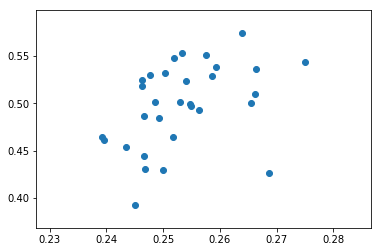

In [11]:
plot.scatter(x=df_teams_ave_bat,y=df_teams_ave_ratio)
pd.concat([df_teams_ave_bat,df_teams_ave_ratio],axis=1).corr('pearson')

The average batting of the team is positively related to its total winnings.

## Task 3

### 3.1 )

In [14]:
teams_ave_era = {}
for _,row in df_teams_sub.iterrows():
    if row['teamID'] not in teams_ave_era:
        teams_ave_era[row.teamID]=float(row.ERA)
    else:
        teams_ave_era[row.teamID]=float(row.ERA)+teams_ave_era[row.teamID]

for i in teams_ave_era:
    teams_ave_era[i]=teams_ave_era[i]/team_years[i]
        
df_teams_ave_era = pd.Series(teams_ave_era)
df_teams_ave_era.sort_values(ascending=False)

COL    4.794
MIN    4.508
HOU    4.308
TOR    4.202
BOS    4.202
BAL    4.094
CHA    4.074
TEX    4.026
CHN    4.022
CLE    4.012
DET    4.010
ARI    3.990
FLO    3.950
PHI    3.930
MIL    3.928
MIA    3.900
KCA    3.886
LAA    3.868
SEA    3.860
NYA    3.858
NYN    3.794
CIN    3.760
SDN    3.754
OAK    3.622
SFN    3.620
ATL    3.574
PIT    3.568
TBA    3.562
SLN    3.462
WAS    3.430
LAN    3.394
dtype: float64

### 3.2 )

,0,1
0,1.000000,-0.665413
1,-0.665413,1.000000


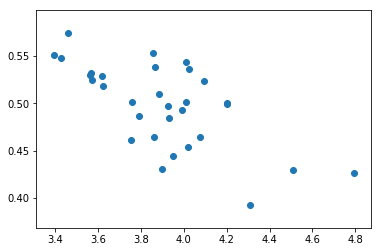

In [15]:
plot.scatter(x=df_teams_ave_era,y=df_teams_ave_ratio)
pd.concat([df_teams_ave_era,df_teams_ave_ratio],axis=1).corr('pearson')

Team’s winning record is related to its pitching performance. And the correlation coefficient is higher than payroll and average batting.